<a href="https://colab.research.google.com/github/Natalia-git97/Brent-Oil-Times-series/blob/main/BrentOilPrices_Exploratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BrentOilPrices.csv')

#Explory Data

In [ ]:
data

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
...,...,...
8549,"Jan 19, 2021",55.38
8550,"Jan 20, 2021",55.66
8551,"Jan 21, 2021",55.68
8552,"Jan 22, 2021",55.22


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8554 entries, 0 to 8553
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    8554 non-null   object 
 1   Price   8554 non-null   float64
dtypes: float64(1), object(1)
memory usage: 133.8+ KB


In [ ]:
data.describe()

,Price
count,8554.000000
mean,46.352962
std,32.165282
min,9.100000
25%,18.850000
50%,33.240000
75%,66.210000
max,143.950000


In [ ]:
data.isnull().sum()

Date     0
Price    0
dtype: int64

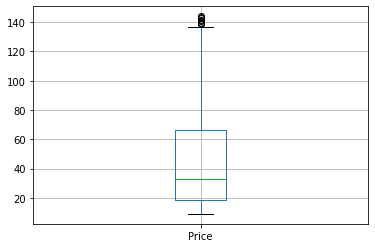

In [ ]:
data.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa8e85f5a10>]],
      dtype=object)

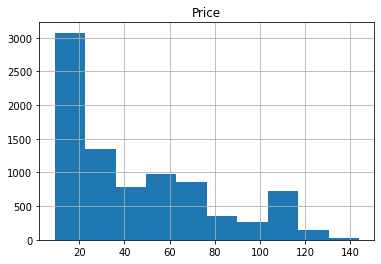

In [ ]:
data.hist()

In [ ]:
data.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [ ]:
#Transformando para o formato de data
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
8549,2021-01-19,55.38
8550,2021-01-20,55.66
8551,2021-01-21,55.68
8552,2021-01-22,55.22


In [ ]:
#Colocando como index a data
data.set_index('Date', inplace=True)
data.head(5)

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


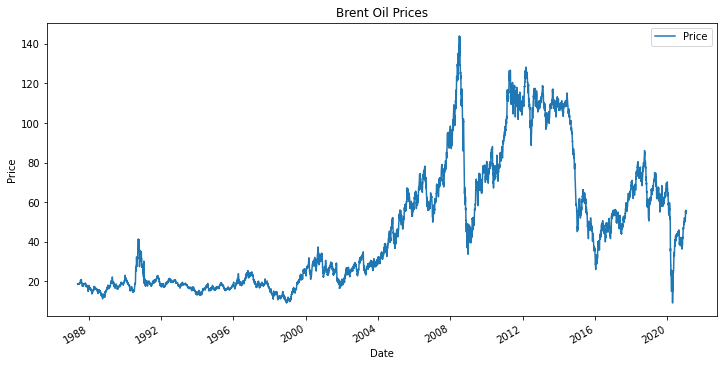

In [ ]:
data.plot(kind='line', figsize=(12,6))

plt.title('Brent Oil Prices')
plt.ylabel('Price')
plt.xlabel('Date')

plt.show() 


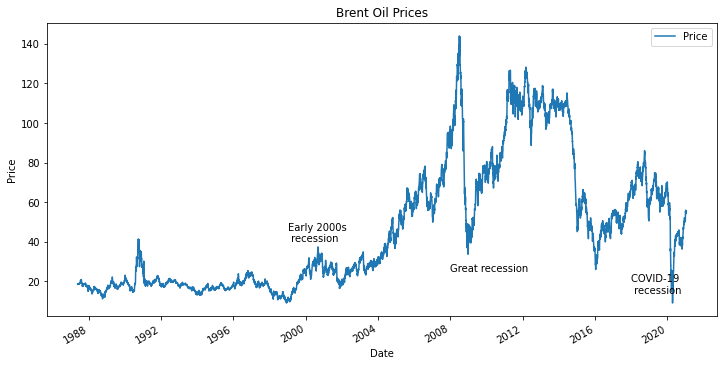

In [ ]:
data.plot(kind='line', figsize = (12,6))

plt.title('Brent Oil Prices')
plt.ylabel('Price')
plt.xlabel('Date')

plt.text('1999-1-1',40,'Early 2000s \n recession')
plt.text('2008-01-1',25, 'Great recession')
plt.text('2018-1-1',14.1,'COVID-19 \n recession')


plt.show() 



#Estacionaridade da Série
Uma série é considerada estacionária, quando seu valor de média e variância se mantém constante ao longo do tempo

In [ ]:
#Dividindo os dados em 4 intervalos e analizando a média e variância
X = data['Price']
split = round(len(X) / 4)
X1, X2, X3, X4 = X[0:split], X[split:split*2], X[split*2:split*3], X[split*3:split*4]
mean1, mean2, mean3, mean4 = X1.mean(), X2.mean(), X3.mean(), X4.mean()
var1, var2, var3, var4 = X1.var(), X2.var(), X3.var(), X4.var()
print('mean1=%f, mean2=%f, mean3=%f, mean4=%f' % (mean1, mean2, mean3, mean4))
print('variance1=%f, variance2=%f, variance3=%f, variance4=%f' % (var1, var2, var3, var4))

mean1=18.333499, mean2=22.302732, mean3=76.261946, mean4=68.505276
variance1=15.333728, variance2=37.691948, variance3=678.168514, variance4=659.510119


Augmented Dickey-Fuller Test - Verifica a estacionaridade da série

Valor de p-value maior que 0.05, a hipótese nula não é rejeitada e conclui-se que a série é não estacionária

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Price'])
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ADF Test Statistic: -2.12
5% Critical Value: -2.86
p-value: 0.24


#Times Series Decomposition

Entendendo melhor o comportamento da série.
Verificando sazonalidade e tendência.

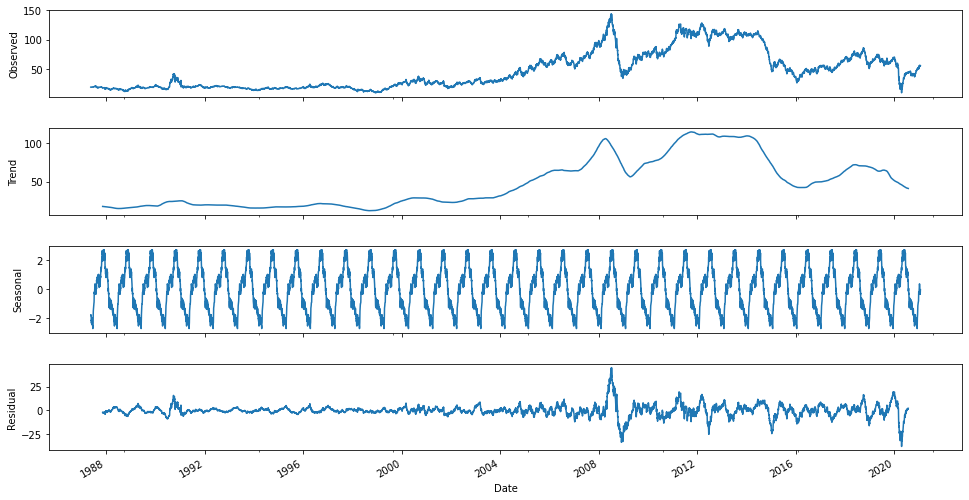

In [ ]:
import statsmodels.api as sm

# decompondo os sinais da serie
res = sm.tsa.seasonal_decompose(data,freq=250)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

Baseado na leitura desses gráficos, decidimos treinar o modelo com os dados de 2006 a 2012. E fazer a validação e predição do modelo no período de 2018 a 2023.

#Moving Average

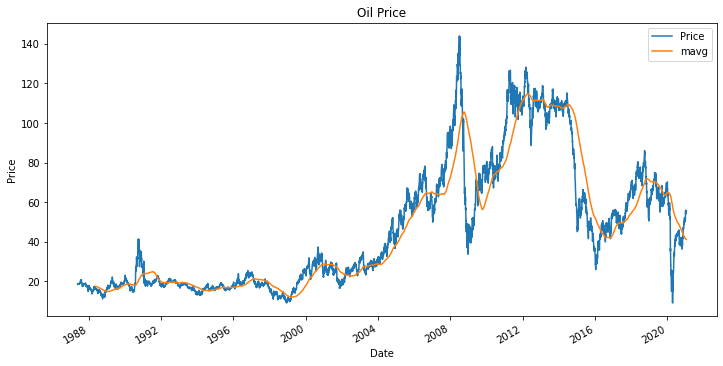

In [ ]:
# Rolling mean
close_px = data['Price']
mavg = close_px.rolling(window=253).mean()

plt.figure(figsize = (12,6))
close_px.plot(label='Price')
mavg.plot(label='mavg')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Oil Price')
plt.legend()